Import niezbędnych bibliotek

In [52]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import Perceptron


Przygotowanie danych(na podstawie zalaczonego pliku)

In [53]:
iris=load_iris()

x = iris.data[:, (2,3)]
y = iris.target

for i in range(np.shape(x)[0]):
    if(y[i]==0):
        y[i]=1
    else:
        y[i]=0
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [54]:
def heaviStepFunc(u):
    return np.where(u >= 0, 1, 0)
bias=0 #
learning_factor=0.02
weights=np.zeros(np.shape(x_train)[1]) #ustawiam startowe wagi na 0

for i in range(np.shape(x_train)[0]):
    u=np.dot(x_train[i], weights)+bias
    fu=heaviStepFunc(u)
    if(fu!=y_train[i]):
        weights+=learning_factor*(y_train[i]-fu)*x_train[i] #na podstawie reguły Widrowa-Hoffa
    bias+=learning_factor*(y_train[i]-fu) 

print(weights)

[-0.038 -0.052]


In [55]:
def accuracy(fu, pred):
    correctNo=0
    for i in range(len(fu)):
        if(fu[i]==pred[i]):
             correctNo+=1
    return correctNo/len(fu)

u_test=np.dot(x_test, weights)+bias
fu_test=heaviStepFunc(u_test)
print(accuracy(fu_test,y_test))

#poziom dokladnosci perceptronu zalezy od doboru wartosci i wag, predkosci uczenia i funkcji aktywacji. Nie rozumiem czemu,ale otrzymałem wynik na poziomie 100% mimo ze wydaje mi sie ze zaimplementowalem model perceptronu zgodnie z Pana praca inzynierska. 

1.0


1.0


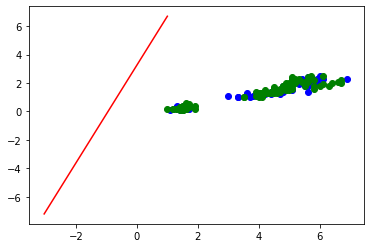

In [58]:
perceptron = Perceptron(random_state=17)
perceptron.fit(x_train, y_train)
perceptronFu = perceptron.predict(x_test)
print(accuracy(perceptronFu, y_test))

#wyznaczam hiperplaszczyzne perceptronu ze wzoru w1x1+...+wnxn+b=0
x1_min=np.min(x_train[:,0])
x1_max=np.max(x_train[:,0])
x2_min=(-weights[0]*x1_min+bias)/weights[1]
x2_max=(-weights[0]*x1_max+bias)/weights[1]
plt.plot([x1_min,x2_min],[x1_max,x2_max], color="red")
plt.scatter(x_test[:,0], x_test[:,1], color="blue")
plt.scatter(x_train[:,0], x_train[:,1], color="green")
plt.show()

Moim zdaniem do klasyfikacji obiektów perceptron jest lepszym rozwiazaniem niz regresja liniowa, poniewaz pozwala jednoznacznie okreslac(w ramach tego czego sie nauczyl) czy jakas probka nalezy do danej klasy. Regresja liniowa jest lepsza do okreslenia generalnego modelu danych treningowych w celu przewidywania ile mniej wiecej przyszle/pozostale dane moga wynosic.